In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt

# Posición inicial del lector de efecto Hall
a = -1
b = 2
hall_x = a
hall_y = b

In [ ]:
# Definir la función para calcular el campo magnético en un punto dado
def calcular_campo_magnetico(x, y, hall_x, hall_y):
    # Calcular la distancia del punto al imán y al lector de efecto Hall
    distancia_iman = np.sqrt(x**2 + y**2)
    distancia_hall = np.sqrt((hall_x)**2 + (hall_y)**2)

    # Establecer el valor máximo del campo magnético
    campo_maximo = 1.0

    # Calcular el campo magnético en el punto
    campo = campo_maximo / (1 + distancia_iman)
    angulo = np.arctan2(y, x)
    bx = campo * np.cos(angulo)
    by = campo * np.sin(angulo)

    # Calcular el campo medido por el medidor de efecto Hall (decae con la distancia)
    if distancia_hall == 0:
        campo_medido = campo_maximo
    else:
        campo_medido = campo_maximo / (1 + distancia_hall)

    return bx, by, distancia_hall, campo_medido

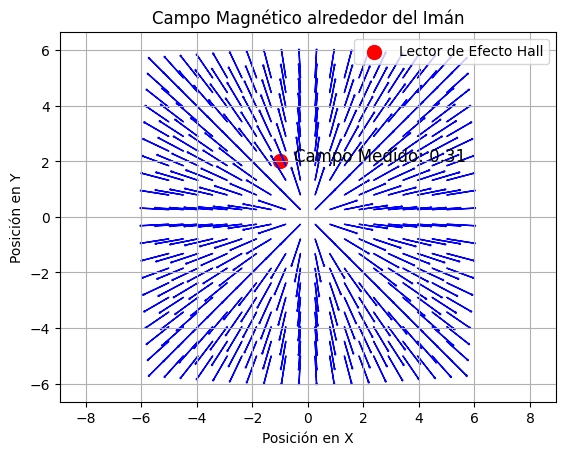

El valor del campo en  x= -1 y= 2 es:  0.3090169943749474


In [ ]:
# Crear una cuadrícula de puntos alrededor del imán
x = np.linspace(-5, 5, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)

# Calcular el campo magnético en cada punto de la cuadrícula
BX, BY, distancia_hall, campo_medido = np.vectorize(calcular_campo_magnetico)(X, Y, hall_x, hall_y)

# Crear el gráfico de vectores
plt.figure()

# Añadir un punto (lector de efecto Hall)
plt.scatter(hall_x, hall_y, color='red', s=100, label='Lector de Efecto Hall')

# Añadir vectores normalizados para representar el campo magnético
for i in range(len(X)):
    for j in range(len(X[i])):
        magnitud = np.sqrt(BX[i, j]**2 + BY[i, j]**2)
        if magnitud != 0:
            bx_normalized = BX[i, j] / magnitud
            by_normalized = BY[i, j] / magnitud
            plt.arrow(X[i, j], Y[i, j], bx_normalized, by_normalized, head_width=0.05, head_length=0.05, color='blue')

# Mostrar el valor del campo medido por el lector de efecto Hall
plt.text(hall_x + 0.5, hall_y, f'Campo Medido: {campo_medido[a, b]:.2f}', fontsize=12, color='black')

# Configurar el diseño del gráfico
plt.xlabel('Posición en X')
plt.ylabel('Posición en Y')
plt.title('Campo Magnético alrededor del Imán')
plt.grid(True)
plt.legend()

# Establecer una relación de aspecto igual
plt.axis('equal')

# Mostrar el gráfico
plt.show()

#Resultado del valor del campo
print("El valor del campo en ","x=",a,"y=",b,"es: ",campo_medido[a, b])

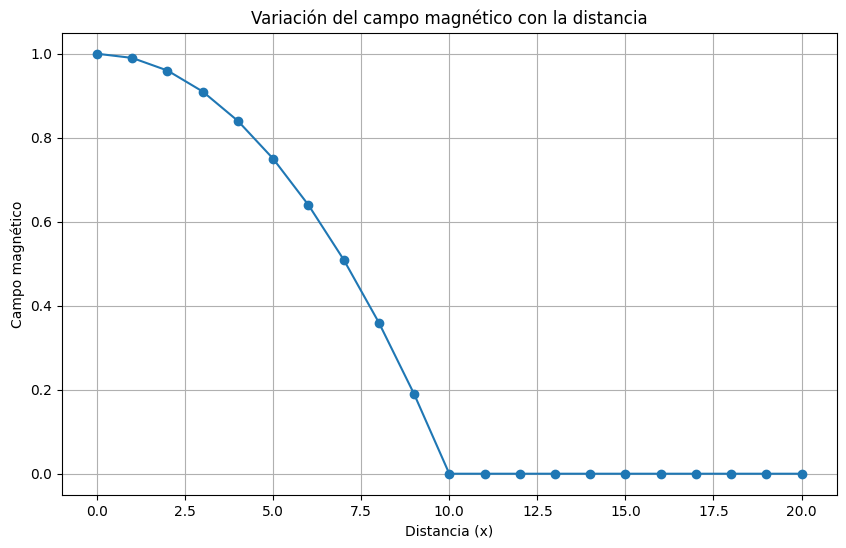

In [ ]:
class MedidorEfectoHall:
    def __init__(self):
        self.posicion_x = 0
        self.campo_magnetico = 1

    def mover(self, delta_x):
        self.posicion_x += delta_x
        self.campo_magnetico = self.calcular_campo_magnetico()

    def calcular_campo_magnetico(self):
        # Asumiendo que el campo magnético disminuye cuadráticamente con la distancia
        # y que el campo magnético es 1 en la posición x=0
        return max(0, 1 - 0.01 * self.posicion_x ** 2)

# Crear el medidor
medidor = MedidorEfectoHall()

# Crear listas para almacenar los valores de posición y campo magnético
posiciones = [0]
campos_magneticos = [1]

# Mover el medidor y almacenar los valores
for i in range(20):
    medidor.mover(1)
    posiciones.append(medidor.posicion_x)
    campos_magneticos.append(medidor.campo_magnetico)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(posiciones, campos_magneticos, marker='o')
plt.title('Variación del campo magnético con la distancia')
plt.xlabel('Distancia (x)')
plt.ylabel('Campo magnético')
plt.grid(True)
plt.show()